### Image classification

In [5]:
from datasets import load_dataset
ds = load_dataset("Nattakarn/fruit-and-vegetable-image-recognition")

In [9]:
len(ds["train"]) , len(ds["test"]) 

(2492, 623)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [10]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# Load the dataset
ds = load_dataset("Nattakarn/fruit-and-vegetable-image-recognition")

def get_image_size(example):
    image = example["image"]
    if isinstance(image, Image.Image):
        width, height = image.size
        return {"width": width, "height": height}
    else:
        return {"width": None, "height": None}

# Get the sizes of all images in the training split
sizes_ds = ds["train"].map(get_image_size)

# Count the occurrences of each unique size
all_sizes = [(item["width"], item["height"]) for item in sizes_ds]
size_counts = Counter(all_sizes)

print("Unique image sizes and their counts:")
for size, count in size_counts.items():
    print(f"Size: {size}, Count: {count}")

# Choose a size you want to visualize (pick one that has multiple images)
target_size = (64, 64)  # Example: Replace with a size you see in the output

# Filter the dataset to get images with the target size
def filter_by_size(example):
    image = example["image"]
    if isinstance(image, Image.Image):
        width, height = image.size
        return (width, height) == target_size
    return False

same_size_ds = ds["train"].filter(filter_by_size)

# Display a few images with the target size
num_to_display = min(5, len(same_size_ds))  # Display up to 5 images
print(f"\nDisplaying {num_to_display} images with size {target_size}:")

for i in range(num_to_display):
    example = same_size_ds[i]
    image = example["image"]
    label = example["label"]
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {label}, Size: {image.size}")
    plt.axis('off')
    plt.show()

Map:   0%|          | 0/2492 [00:00<?, ? examples/s]

Unique image sizes and their counts:
Size: (800, 800), Count: 34
Size: (2000, 1334), Count: 1
Size: (1200, 628), Count: 13
Size: (800, 537), Count: 1
Size: (1200, 1200), Count: 25
Size: (995, 615), Count: 1
Size: (556, 313), Count: 1
Size: (455, 315), Count: 1
Size: (800, 467), Count: 1
Size: (682, 1024), Count: 2
Size: (2048, 1363), Count: 1
Size: (1400, 1000), Count: 2
Size: (1698, 1131), Count: 5
Size: (710, 510), Count: 1
Size: (720, 1520), Count: 1
Size: (1200, 799), Count: 5
Size: (828, 1600), Count: 1
Size: (840, 560), Count: 2
Size: (779, 1060), Count: 1
Size: (3732, 3085), Count: 1
Size: (1188, 810), Count: 1
Size: (1240, 775), Count: 1
Size: (800, 600), Count: 13
Size: (1024, 1024), Count: 25
Size: (900, 1066), Count: 1
Size: (1000, 1000), Count: 68
Size: (849, 564), Count: 1
Size: (3008, 2000), Count: 5
Size: (1200, 630), Count: 6
Size: (1200, 800), Count: 38
Size: (1280, 720), Count: 34
Size: (1326, 1151), Count: 2
Size: (720, 720), Count: 14
Size: (1280, 960), Count: 10
Si

Filter:   0%|          | 0/2492 [00:00<?, ? examples/s]


Displaying 0 images with size (64, 64):


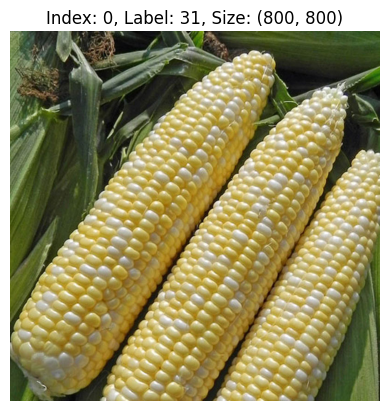

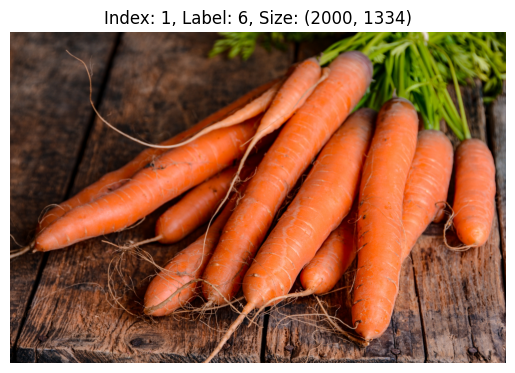

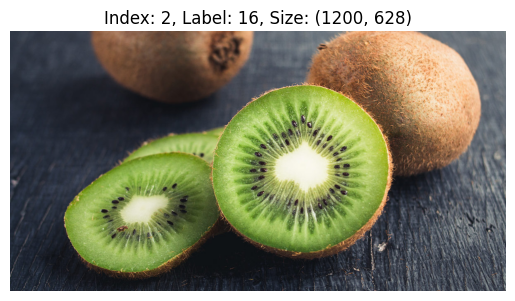

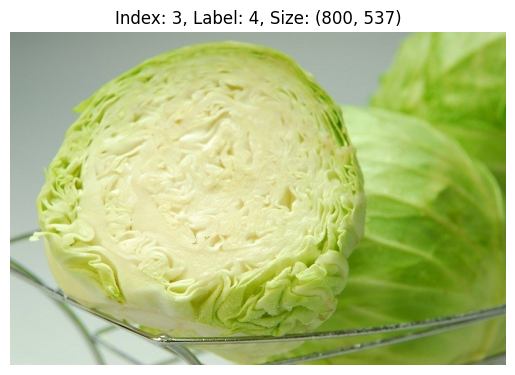

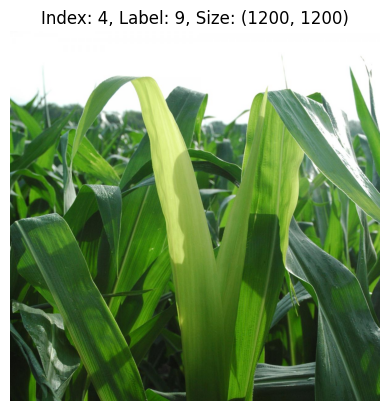

In [14]:
for i in range(5):
    example = ds["train"][i]
    image = example["image"]
    label = example["label"]

    # Display the image
    plt.figure()
    plt.imshow(image)
    plt.title(f"Index: {i}, Label: {label}, Size: {image.size}")
    plt.axis('off')
    plt.show()

In [16]:
IMAGE_SIZE = 256
BATCH_SIZE = 32


In [22]:

import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'transformed_image' is your PyTorch Tensor (e.g., of shape (3, 256, 256))



# For a batch of images (assuming 'batch_of_transformed_images' is a tensor of shape (batch_size, 3, 256, 256)):
def show_batch_tensor_matplotlib(batch_tensor):
    grid_img = torchvision.utils.make_grid(batch_tensor) # Creates a grid of images
    plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()

# import torchvision # Make sure to import torchvision if you use make_grid
# show_batch_tensor_matplotlib(your_batch_of_transformed_images)

In [37]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (equivalent to image_size and interpolation)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    # transforms.ToTensor() # Converts PIL Image to Tensor
])





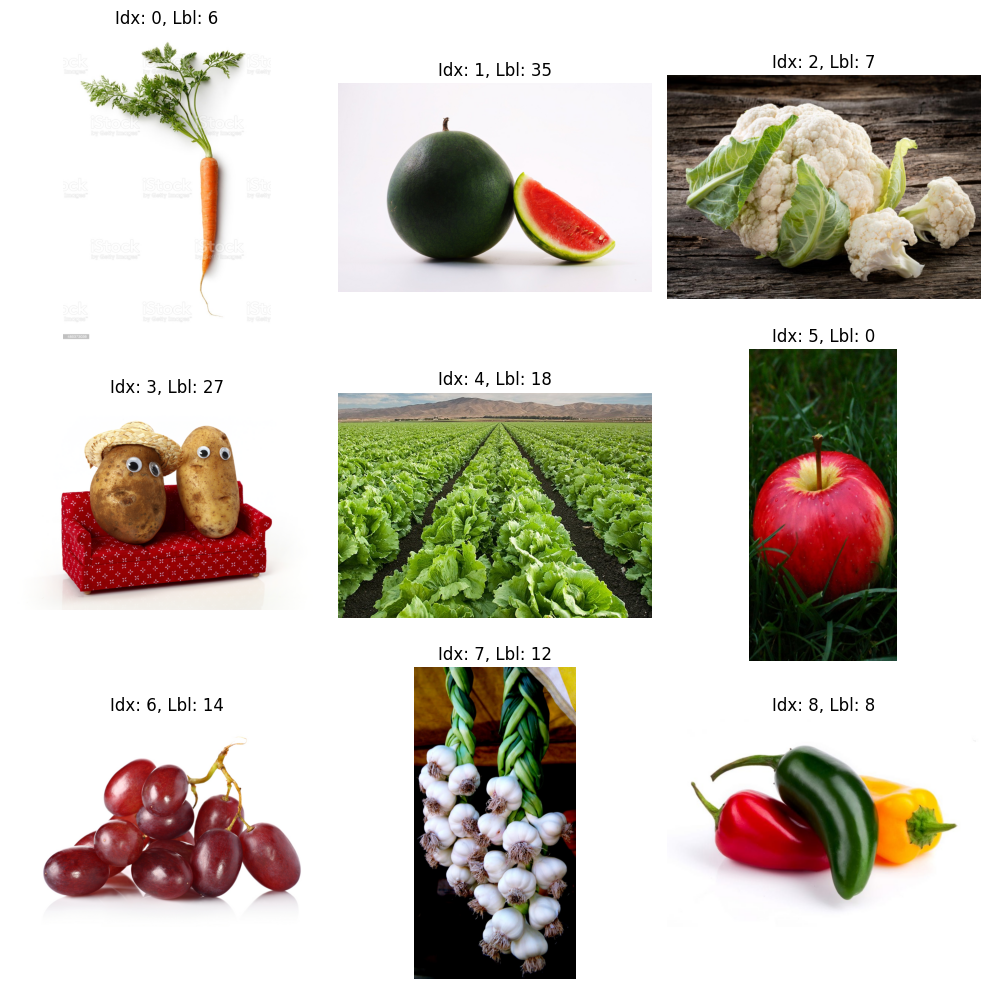

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a figure with 3x3 subplots

for i in range(9):
    example = ds["train"][i+9]
    image = example["image"]
    label = example["label"]

    # Calculate the row and column for the subplot
    row = i // 3
    col = i % 3

    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Idx: {i}, Lbl: {label}")
    axes[row, col].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

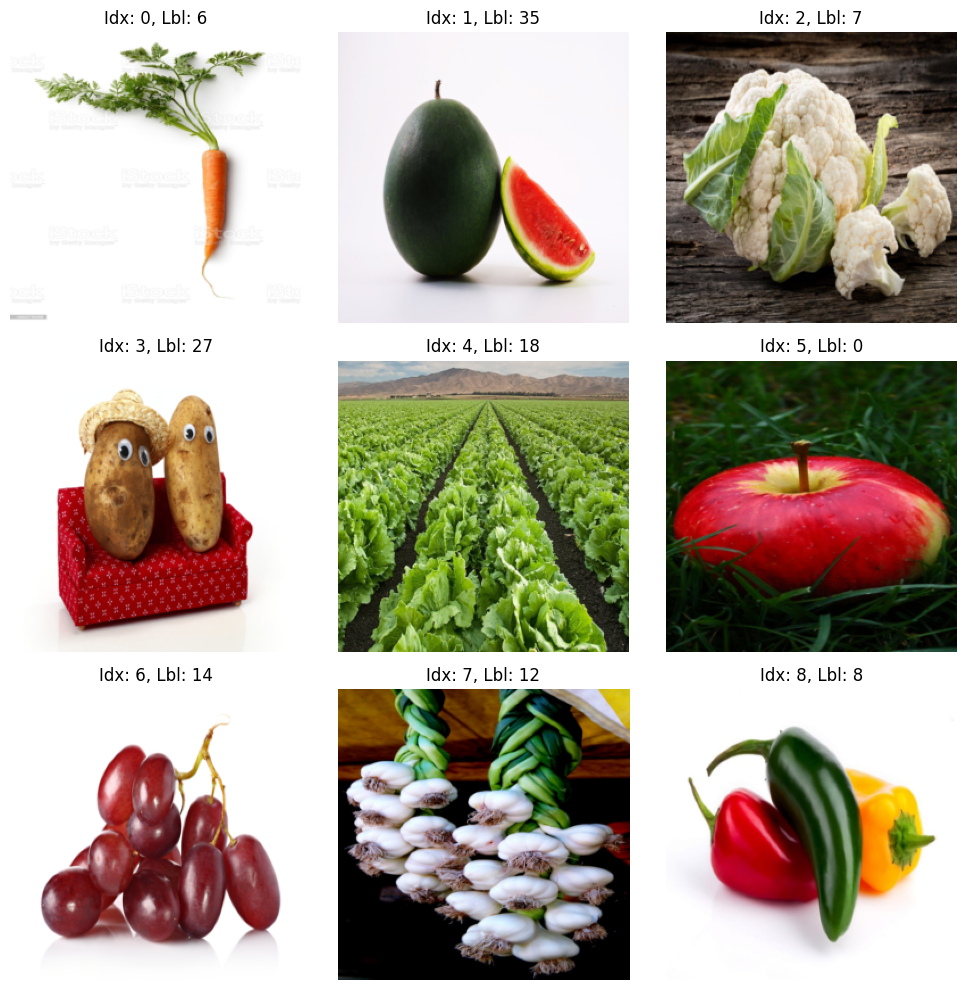

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a figure with 3x3 subplots

for i in range(9):
    example = ds["train"][i+9]
    image = transform(example["image"])
    label = example["label"]

    # Calculate the row and column for the subplot
    row = i // 3
    col = i % 3

    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Idx: {i}, Lbl: {label}")
    axes[row, col].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()